<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/SalaryData_Train.csv")

#**EDA**

In [ ]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
     print(df[i].value_counts())
     print(" ")

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
     print(df[i].value_counts())
     print(" ")

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584


In [ ]:
df['workclass'] = df['workclass'].str.strip()
df['workclass'] = df['workclass'].replace({'Without-pay': 'Self-emp-not-inc'})
df['education'] = df['education'].str.strip()
df['education'] = df['education'].replace({'1st-4th': 'Elementary school',
                                           '5th-6th' : 'Elementary school',
                                           '7th-8th' : 'Elementary school',
                                           '9th' : 'HS-grad',
                                           '12th' : 'HS-grad',
                                           '10th' : 'HS-grad',
                                           '11th' : 'HS-grad',
                                           'Some-college' : 'Bachelors',
                                           'Bachelors' : 'Higher Education',
                                           'Masters' : 'Higher Education',
                                           'Assoc-acdm' : 'Higher Education',
                                           'Doctorate' : 'Higher Education',
                                           'Prof-school' : 'Higher Education',
                                           'HS-grad' : 'Secondary Education',
                                           'Assoc-voc' : 'Secondary Education',
                                           'Elementary school' : 'Primary Education',
                                           'Preschool' : 'Primary Education'
                                           })
df['maritalstatus'] = df['maritalstatus'].str.strip()
df['maritalstatus'] = df['maritalstatus'].replace({'Married-civ-spouse': 'Married',
                                                   'Married-spouse-absent': 'Married',
                                                   'Married-AF-spouse' : 'Married',
                                                   'Divorced' : 'Seperated/Divorced',
                                                   'Separated' : 'Seperated/Divorced'
                                                   })
df['occupation'] = df['occupation'].str.strip()
df['occupation'] = df['occupation'].replace({'Prof-specialty': 'White-collar jobs',
                                             'Exec-managerial' : 'White-collar jobs',
                                             'Adm-clerical' : 'White-collar jobs',
                                             'Tech-support' : 'White-collar jobs',
                                             'Craft-repair' : 'Blue-Collar jobs',
                                             'Machine-op-inspct' : 'Blue-Collar jobs',
                                             'Transport-moving' : 'Blue-Collar jobs',
                                             'Handlers-cleaner' : 'Blue-Collar jobs',
                                             'Sales' : 'Sales/Services',
                                             'Other-service' : 'Sales/Services',
                                             'Protective-serv' : 'Sales/Services',
                                             'Priv-house-serv' : 'Sales/Services',
                                             'Farming-fishing' : 'Specialized Roles',
                                             'Armed-Forces' : 'Specialized Roles'
                                             })
df['relationship'] = df['relationship'].str.strip()
df['relationship'] = df['relationship'].replace({'Husband': 'Spouse',
                                                 'Wife' : 'Spouse'})
df['native'] = df['native'].str.strip()
df['native'] = df['native'].replace({'United-States': 'North-America',
                                     'Mexico' : 'North-America',
                                     'Canada' : 'North-America',
                                     'Puerto-Rico' : 'North-America',
                                     'Philippines' : 'Asia',
                                     'India' : 'Asia',
                                     'China' : 'Asia',
                                     'Japan' : 'Asia',
                                     'Vietnam' : 'Asia',
                                     'Cambodia' : 'Asia',
                                     'Laos' : 'Asia',
                                     'Thailand' : 'Asia',
                                     'Hong kong' : 'Asia',
                                     'Germany' : 'Europe',
                                     'Cuba' : 'Europe',
                                     'England' : 'Europe',
                                     'Italy' : 'Europe',
                                     'Poland' : 'Europe',
                                     'Ireland' : 'Europe',
                                     'Greece' : 'Europe',
                                     'France' : 'Europe',
                                     'Portugal' : 'Europe',
                                     'Scotland' : 'Europe',
                                     'El-Salvador' : 'Latin America',
                                     'Dominican-Republic' : 'Latin America',
                                     'Guatemala' : 'Latin America',
                                     'Jamaica' : 'Latin America',
                                     'Trinadad&Tobago' : 'Latin America',
                                     'Haiti' : 'Latin America',
                                     'Nicaragua' : 'Latin America',
                                     'Peru' : 'Latin America',
                                     'Ecuador' : 'Latin America',
                                     'South China' : 'Other',
                                     'Yugoslavia' : 'Other',
                                     'Outlying-US' : 'Other',
                                     'Hungary' : 'Other',
                                     'Honduras' : 'Other',
                                     'Iran' : 'Other',
                                     'Taiwan' : 'Other',
                                     'Outlying-US(Guam-USVI-etc)' : 'Other',
                                     'Columbia' : 'Other',
                                     'South' : 'Other',
                                     'Hong' : 'Asia'
                                     })


In [ ]:
for i in df.columns:
  if df[i].dtype=='object':
     print(df[i].value_counts())
     print(" ")

Private             22285
Self-emp-not-inc     2513
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Name: workclass, dtype: int64
 
Secondary Education    11147
Higher Education        8596
Bachelors               6677
HS-grad                 2700
Elementary school        996
Primary Education         45
Name: education, dtype: int64
 
Married               14456
Never-married          9725
Seperated/Divorced     5153
Widowed                 827
Name: maritalstatus, dtype: int64
 
White-collar jobs    12663
Sales/Services        7583
Blue-Collar jobs      7567
Handlers-cleaners     1350
Specialized Roles      998
Name: occupation, dtype: int64
 
Spouse            13869
Not-in-family      7726
Own-child          4466
Unmarried          3212
Other-relative      888
Name: relationship, dtype: int64
 
 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
df = df.drop('educationno', axis=1)

#**UNIVARIATE ANALYSIS**

{'whiskers': [<matplotlib.lines.Line2D at 0x79674e572830>,
 'caps': [<matplotlib.lines.Line2D at 0x79674e5700d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79674e573160>],
 'medians': [<matplotlib.lines.Line2D at 0x79674e572020>],
 'fliers': [<matplotlib.lines.Line2D at 0x79674e5720b0>],
 'means': []}

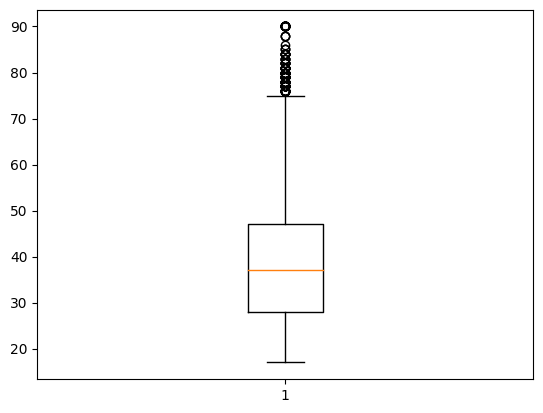

In [ ]:
plt.boxplot(df['age'])

In [ ]:
Q3 = df['age'].quantile(q=0.75)
Q1 = df['age'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

a = cap_extreme_values(df['age'], lower_bound, upper_bound)
df['age'] = a

19.0


{'whiskers': [<matplotlib.lines.Line2D at 0x79674e6f5bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x79674e6f73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79674e6f6110>],
 'medians': [<matplotlib.lines.Line2D at 0x79674e6df190>],
 'fliers': [<matplotlib.lines.Line2D at 0x79674e6de590>],
 'means': []}

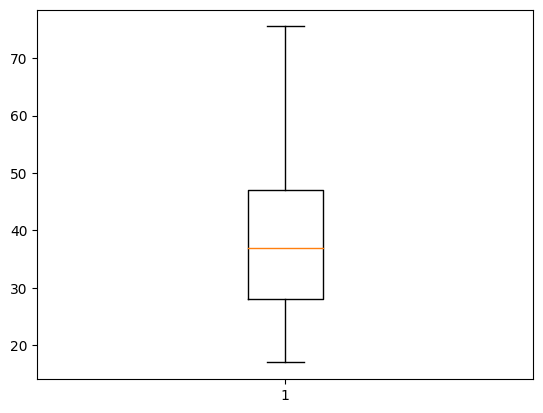

In [ ]:
plt.boxplot(df['age'])

In [ ]:
Q3 = df['capitalgain'].quantile(q=0.75)
Q1 = df['capitalgain'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

b = cap_extreme_values(df['capitalgain'], lower_bound, upper_bound)
df['capitalgain'] = b

0.0


In [ ]:
Q3 = df['capitalloss'].quantile(q=0.75)
Q1 = df['capitalloss'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

c = cap_extreme_values(df['capitalloss'], lower_bound, upper_bound)
df['capitalloss'] = c

0.0


In [ ]:
Q3 = df['hoursperweek'].quantile(q=0.75)
Q1 = df['hoursperweek'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

d = cap_extreme_values(df['hoursperweek'], lower_bound, upper_bound)
df['hoursperweek'] = d

5.0


{'whiskers': [<matplotlib.lines.Line2D at 0x796752b40970>,
 'caps': [<matplotlib.lines.Line2D at 0x796752b417b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x796752b43c10>],
 'medians': [<matplotlib.lines.Line2D at 0x796752b436a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x796752b41ab0>],
 'means': []}

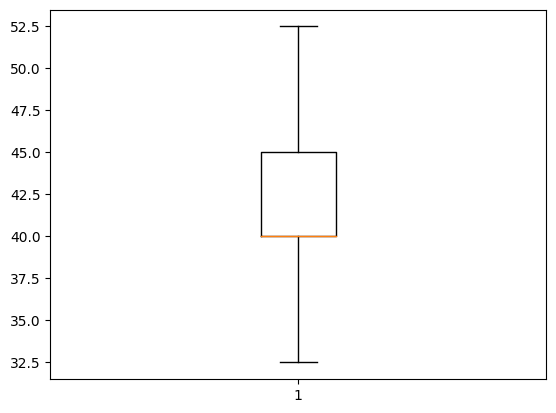

In [ ]:
plt.boxplot(df['hoursperweek'])

In [ ]:
df.duplicated().shape

(30161,)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30161 non-null  float64
 1   workclass      30161 non-null  object 
 2   education      30161 non-null  object 
 3   maritalstatus  30161 non-null  object 
 4   occupation     30161 non-null  object 
 5   relationship   30161 non-null  object 
 6   race           30161 non-null  object 
 7   sex            30161 non-null  object 
 8   capitalgain    30161 non-null  int64  
 9   capitalloss    30161 non-null  int64  
 10  hoursperweek   30161 non-null  float64
 11  native         30161 non-null  object 
 12  Salary         30161 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 3.0+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label Encoding and One-hot encoding
label = LabelEncoder()
df['workclass'] = label.fit_transform(df['workclass'])
df['education'] = label.fit_transform(df['education'])
df['maritalstatus'] = label.fit_transform(df['maritalstatus'])
df['occupation'] = label.fit_transform(df['occupation'])
df['relationship'] = label.fit_transform(df['relationship'])
df['race'] = label.fit_transform(df['race'])
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df['native'] = label.fit_transform(df['native'])
df['native'] = label.fit_transform(df['native'])
df = pd.get_dummies(df, columns=['Salary'], drop_first=True)

In [ ]:
df

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K
0,39.0,5,3,1,4,0,4,0,0,40.0,3,1,0
1,50.0,4,3,0,4,3,4,0,0,32.5,3,1,0
2,38.0,2,5,2,1,0,4,0,0,40.0,3,1,0
3,53.0,2,2,0,1,3,2,0,0,40.0,3,1,0
4,28.0,2,3,0,4,3,2,0,0,40.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27.0,2,3,0,4,3,4,0,0,38.0,3,0,0
30157,40.0,2,5,0,0,3,4,0,0,40.0,3,1,1
30158,58.0,2,5,3,4,4,4,0,0,40.0,3,0,0
30159,22.0,2,5,1,4,2,4,0,0,32.5,3,1,0


#**FEATURE ENGINEERING**

In [ ]:
#Feature Engineer
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df['age1'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

bins1 = [0, 20, 40, 60, 100]
labels1 = ['Part-Time', 'Full-Time', 'Over-Time', 'Extreme']


df['working_hours'] = pd.cut(df['hoursperweek'], bins=bins1, labels=labels1, right=False)

In [ ]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K,age1,working_hours
0,39.0,5,3,1,4,0,4,0,0,40.0,3,1,0,36-50,Over-Time
1,50.0,4,3,0,4,3,4,0,0,32.5,3,1,0,51-65,Full-Time
2,38.0,2,5,2,1,0,4,0,0,40.0,3,1,0,36-50,Over-Time
3,53.0,2,2,0,1,3,2,0,0,40.0,3,1,0,51-65,Over-Time
4,28.0,2,3,0,4,3,2,0,0,40.0,1,0,0,19-35,Over-Time


In [ ]:
df = df.drop('age', axis=1)

In [ ]:
df.head()

,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K,age1,working_hours
0,5,3,1,4,0,4,0,0,40.0,3,1,0,36-50,Over-Time
1,4,3,0,4,3,4,0,0,32.5,3,1,0,51-65,Full-Time
2,2,5,2,1,0,4,0,0,40.0,3,1,0,36-50,Over-Time
3,2,2,0,1,3,2,0,0,40.0,3,1,0,51-65,Over-Time
4,2,3,0,4,3,2,0,0,40.0,1,0,0,19-35,Over-Time


In [ ]:
df['age1'] = df['age1'].str.strip()
df['age1'] = df['age1'].replace({'0-18': 'Young Adults',
                                 '19-35':'Young Adults',
                                 '36-50' : 'Middle-Aged',
                                 '51-65' : 'Middle-Aged',
                                 '66-100' : 'Seniors'})

In [ ]:
df['age1'].unique()

array(['Middle-Aged', 'Young Adults', 'Seniors'], dtype=object)

In [ ]:
df['age1'] = label.fit_transform(df['age1'])
df['working_hours'] = label.fit_transform(df['working_hours'])


In [ ]:
df = df.drop('hoursperweek', axis=1)


#**BIVARIATE ANALYSIS**

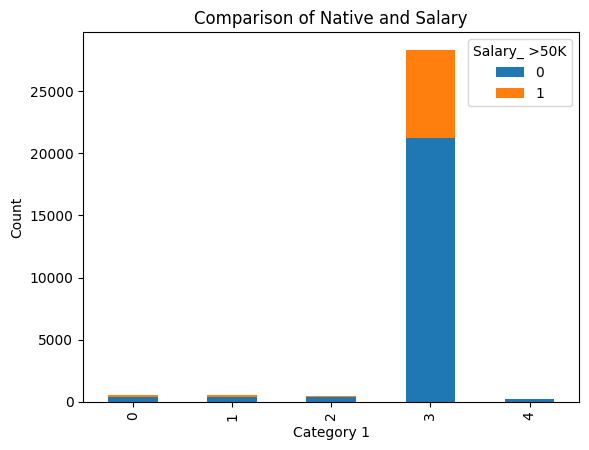

In [ ]:
cross_tab = pd.crosstab(df['native'], df['Salary_ >50K'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Native and Salary')
plt.show()

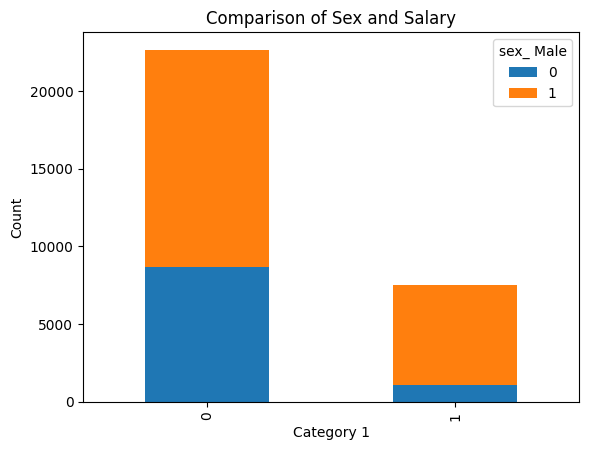

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['sex_ Male'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Sex and Salary')
plt.show()

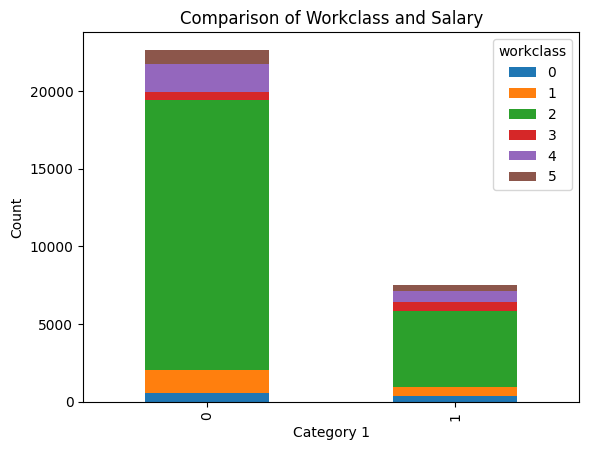

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['workclass'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Workclass and Salary')
plt.show()

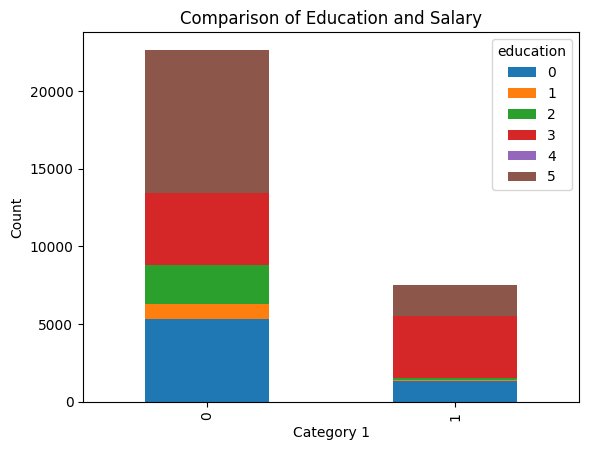

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['education'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Education and Salary')
plt.show()

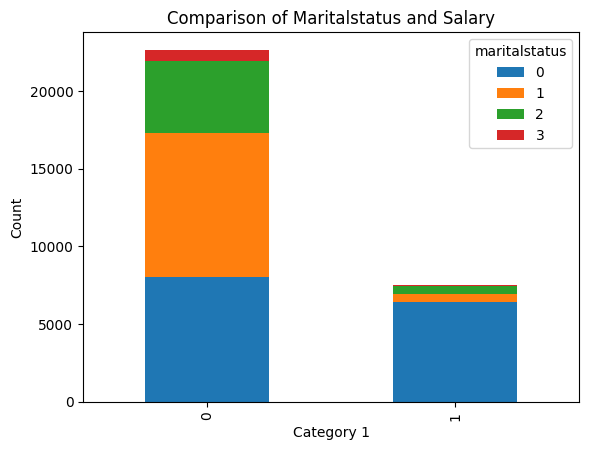

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['maritalstatus'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Maritalstatus and Salary')
plt.show()

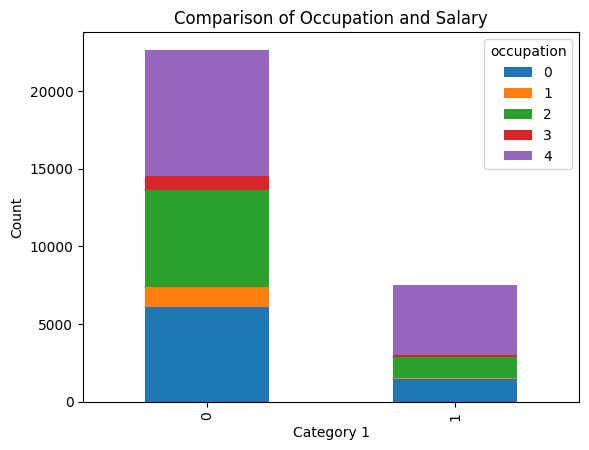

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['occupation'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Occupation and Salary')
plt.show()

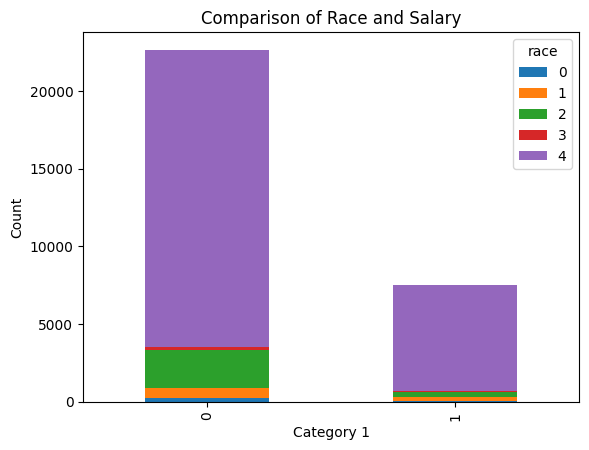

In [ ]:
cross_tab = pd.crosstab(df['Salary_ >50K'], df['race'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Race and Salary')
plt.show()

In [ ]:
#Plot b/w numerical and categorical variable

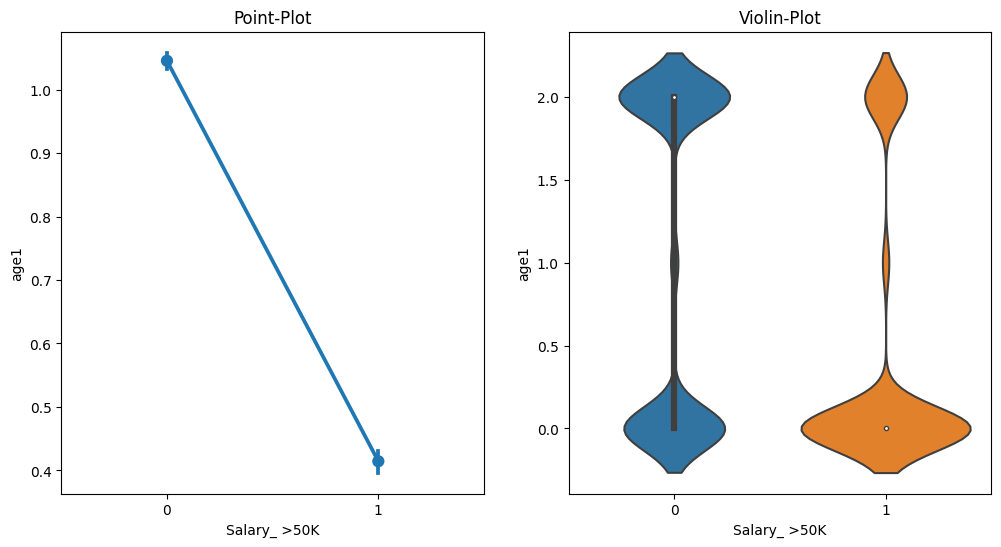

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df['Salary_ >50K'], y=df['age1'], data=df, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df['Salary_ >50K'], y=df['age1'], data=df, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.show()

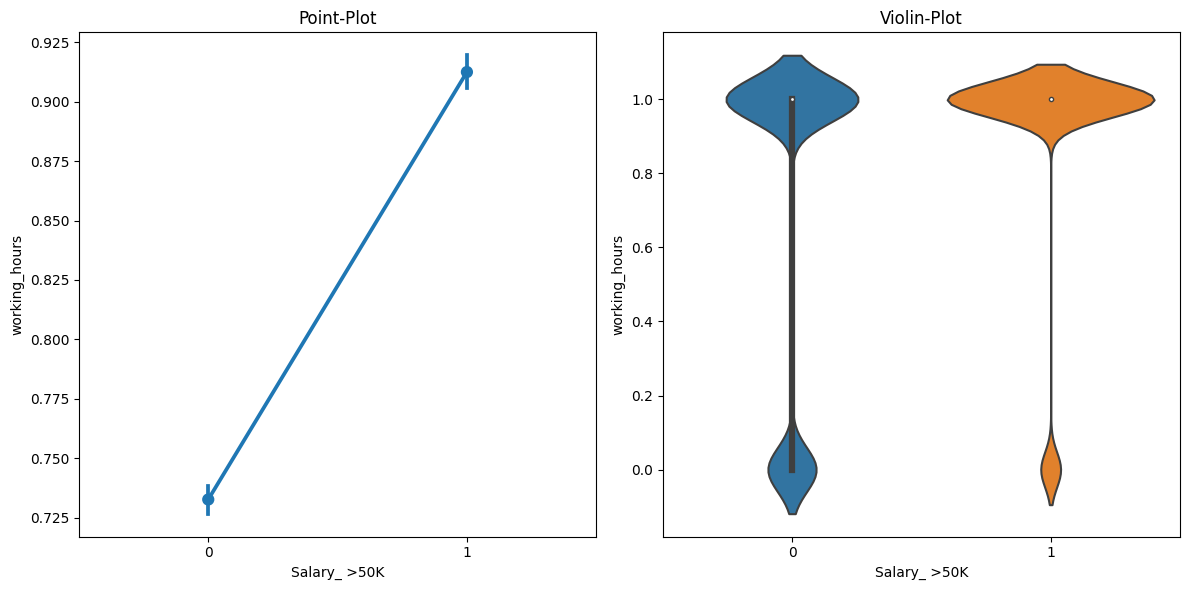

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df['Salary_ >50K'], y=df['working_hours'], data=df, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df['Salary_ >50K'], y=df['working_hours'], data=df, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.tight_layout()
plt.show()

#**TEST DATASET**

In [ ]:
df1 = pd.read_csv("/content/SalaryData_Test.csv")

#**EDA**

In [ ]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
for i in df1.columns:
  if df1[i].dtype=='object':
     print(df1[i].value_counts())
     print(" ")

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
 
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 
 Exec-managerial      1992
 Craft-repair         1990
 Prof-specialty       1970
 Sales                1824
 Adm-clerical         1819
 Other-

In [ ]:
df1['workclass'] = df1['workclass'].str.strip()
df1['workclass'] = df1['workclass'].replace({'Without-pay': 'Self-emp-not-inc'})
df1['education'] = df1['education'].str.strip()
df1['education'] = df1['education'].replace({'1st-4th': 'Elementary school',
                                           '5th-6th' : 'Elementary school',
                                           '7th-8th' : 'Elementary school',
                                           '9th' : 'HS-grad',
                                           '12th' : 'HS-grad',
                                           '10th' : 'HS-grad',
                                           '11th' : 'HS-grad',
                                           'Some-college' : 'Bachelors',
                                           'Bachelors' : 'Higher Education',
                                           'Masters' : 'Higher Education',
                                           'Assoc-acdm' : 'Higher Education',
                                           'Doctorate' : 'Higher Education',
                                           'Prof-school' : 'Higher Education',
                                           'HS-grad' : 'Secondary Education',
                                           'Assoc-voc' : 'Secondary Education',
                                           'Elementary school' : 'Primary Education',
                                           'Preschool' : 'Primary Education'
                                           })
df1['maritalstatus'] = df1['maritalstatus'].str.strip()
df1['maritalstatus'] = df1['maritalstatus'].replace({'Married-civ-spouse': 'Married',
                                                   'Married-spouse-absent': 'Married',
                                                   'Married-AF-spouse' : 'Married',
                                                   'Divorced' : 'Seperated/Divorced',
                                                   'Separated' : 'Seperated/Divorced'
                                                   })
df1['occupation'] = df1['occupation'].str.strip()
df1['occupation'] = df1['occupation'].replace({'Prof-specialty': 'White-collar jobs',
                                             'Exec-managerial' : 'White-collar jobs',
                                             'Adm-clerical' : 'White-collar jobs',
                                             'Tech-support' : 'White-collar jobs',
                                             'Craft-repair' : 'Blue-Collar jobs',
                                             'Machine-op-inspct' : 'Blue-Collar jobs',
                                             'Transport-moving' : 'Blue-Collar jobs',
                                             'Handlers-cleaner' : 'Blue-Collar jobs',
                                             'Sales' : 'Sales/Services',
                                             'Other-service' : 'Sales/Services',
                                             'Protective-serv' : 'Sales/Services',
                                             'Priv-house-serv' : 'Sales/Services',
                                             'Farming-fishing' : 'Specialized Roles',
                                             'Armed-Forces' : 'Specialized Roles'
                                             })
df1['relationship'] = df1['relationship'].str.strip()
df1['relationship'] = df1['relationship'].replace({'Husband': 'Spouse',
                                                 'Wife' : 'Spouse'})
df1['native'] = df1['native'].str.strip()
df1['native'] = df1['native'].replace({'United-States': 'North-America',
                                     'Mexico' : 'North-America',
                                     'Canada' : 'North-America',
                                     'Puerto-Rico' : 'North-America',
                                     'Philippines' : 'Asia',
                                     'India' : 'Asia',
                                     'China' : 'Asia',
                                     'Japan' : 'Asia',
                                     'Vietnam' : 'Asia',
                                     'Cambodia' : 'Asia',
                                     'Laos' : 'Asia',
                                     'Thailand' : 'Asia',
                                     'Hong kong' : 'Asia',
                                     'Germany' : 'Europe',
                                     'Cuba' : 'Europe',
                                     'England' : 'Europe',
                                     'Italy' : 'Europe',
                                     'Poland' : 'Europe',
                                     'Ireland' : 'Europe',
                                     'Greece' : 'Europe',
                                     'France' : 'Europe',
                                     'Portugal' : 'Europe',
                                     'Scotland' : 'Europe',
                                     'El-Salvador' : 'Latin America',
                                     'Dominican-Republic' : 'Latin America',
                                     'Guatemala' : 'Latin America',
                                     'Jamaica' : 'Latin America',
                                     'Trinadad&Tobago' : 'Latin America',
                                     'Haiti' : 'Latin America',
                                     'Nicaragua' : 'Latin America',
                                     'Peru' : 'Latin America',
                                     'Ecuador' : 'Latin America',
                                     'South China' : 'Other',
                                     'Yugoslavia' : 'Other',
                                     'Outlying-US' : 'Other',
                                     'Hungary' : 'Other',
                                     'Honduras' : 'Other',
                                     'Iran' : 'Other',
                                     'Taiwan' : 'Other',
                                     'Outlying-US(Guam-USVI-etc)' : 'Other',
                                     'Columbia' : 'Other',
                                     'South' : 'Other',
                                     'Hong' : 'Asia'
                                     })

In [ ]:
for i in df1.columns:
  if df1[i].dtype=='object':
     print(df1[i].value_counts())
     print(" ")

Private             11021
Self-emp-not-inc     1304
Local-gov            1033
State-gov             667
Self-emp-inc          572
Federal-gov           463
Name: workclass, dtype: int64
 
Secondary Education    5595
Higher Education       4324
Bachelors              3221
HS-grad                1395
Elementary school       498
Primary Education        27
Name: education, dtype: int64
 
Married               7183
Never-married         4872
Seperated/Divorced    2555
Widowed                450
Name: maritalstatus, dtype: int64
 
White-collar jobs    6289
Sales/Services       3841
Blue-Collar jobs     3738
Handlers-cleaners     696
Specialized Roles     496
Name: occupation, dtype: int64
 
Spouse            6888
Not-in-family     3976
Own-child         2160
Unmarried         1576
Other-relative     460
Name: relationship, dtype: int64
 
 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
Name: race

In [ ]:
df1 = df1.drop('educationno', axis=1)

#**UNIVARIATE ANALYSIS**

{'whiskers': [<matplotlib.lines.Line2D at 0x7967531a3130>,
 'caps': [<matplotlib.lines.Line2D at 0x7967531a3d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x79674f5d8700>],
 'medians': [<matplotlib.lines.Line2D at 0x79674f954070>],
 'fliers': [<matplotlib.lines.Line2D at 0x79674f9557b0>],
 'means': []}

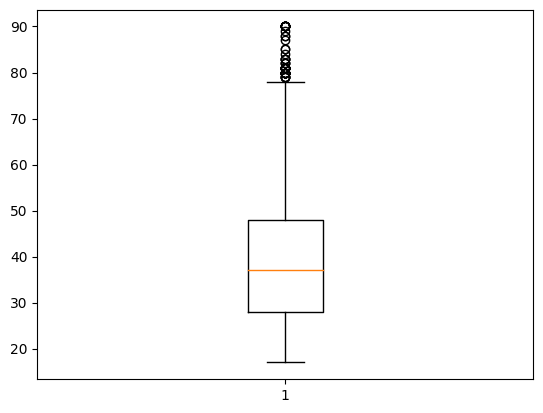

In [ ]:
plt.boxplot(df1['age'])

In [ ]:
Q3 = df1['age'].quantile(q=0.75)
Q1 = df1['age'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

e = cap_extreme_values(df1['age'], lower_bound, upper_bound)
df1['age'] = e

20.0


In [ ]:

# Q3 = df1['capitalgain'].quantile(q=0.75)
# Q1 = df1['capitalgain'].quantile(q=0.25)
# IQR = Q3 - Q1
# print(IQR)
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

# import numpy as np

# def cap_extreme_values(data, lower_bound, upper_bound):
#     capped_data = np.clip(data, lower_bound, upper_bound)
#     return capped_data

# f = cap_extreme_values(df1['capitalgain'], lower_bound, upper_bound)
# df1['capitalgain'] = f


In [ ]:
# Q3 = df1['capitalloss'].quantile(q=0.75)
# Q1 = df1['capitalloss'].quantile(q=0.25)
# IQR = Q3 - Q1
# print(IQR)
# upper_bound = Q3 + 1.5 * IQR
# lower_bound = Q1 - 1.5 * IQR

# import numpy as np

# def cap_extreme_values(data, lower_bound, upper_bound):
#     capped_data = np.clip(data, lower_bound, upper_bound)
#     return capped_data

# g = cap_extreme_values(df1['capitalloss'], lower_bound, upper_bound)
# df1['capitalloss'] = g

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  object
 12  Salary         15060 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


In [ ]:
Q3 = df1['hoursperweek'].quantile(q=0.75)
Q1 = df1['hoursperweek'].quantile(q=0.25)
IQR = Q3 - Q1
print(IQR)
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

h = cap_extreme_values(df1['hoursperweek'], lower_bound, upper_bound)
df1['hoursperweek'] = h

5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Label encoding and one-hot encoding
label = LabelEncoder()
df1['workclass'] = label.fit_transform(df1['workclass'])
df1['education'] = label.fit_transform(df1['education'])
df1['maritalstatus'] = label.fit_transform(df1['maritalstatus'])
df1['occupation'] = label.fit_transform(df1['occupation'])
df1['relationship'] = label.fit_transform(df1['relationship'])
df1['race'] = label.fit_transform(df1['race'])
df1 = pd.get_dummies(df1, columns=['sex'], drop_first=True)
df1['native'] = label.fit_transform(df1['native'])
df1['native'] = label.fit_transform(df1['native'])
df1 = pd.get_dummies(df1, columns=['Salary'], drop_first=True)

In [ ]:
df1

,age,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,hoursperweek,native,sex_ Male,Salary_ >50K
0,25,2,2,1,0,2,2,0,0,40.0,3,1,0
1,38,2,5,0,3,3,4,0,0,50.0,3,1,0
2,28,1,3,0,2,3,4,0,0,40.0,3,1,1
3,44,2,0,0,0,3,2,7688,0,40.0,3,1,1
4,34,2,2,1,2,0,4,0,0,32.5,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,3,1,4,2,4,0,0,40.0,3,1,0
15056,39,2,3,2,4,0,4,0,0,36.0,3,0,0
15057,38,2,3,0,4,3,4,0,0,50.0,3,1,0
15058,44,2,3,2,4,2,1,5455,0,40.0,3,1,0


#**FEATURE ENGINEERING**

In [ ]:
#Feature Engineer
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
df1['age1'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

In [ ]:
df1 = df1.drop('age', axis=1)

In [ ]:
df1['age1'] = df1['age1'].str.strip()
df1['age1'] = df1['age1'].replace({'0-18': 'Young Adults',
                                 '19-35':'Young Adults',
                                 '36-50' : 'Middle-Aged',
                                 '51-65' : 'Middle-Aged',
                                 '66-100' : 'Seniors'})


In [ ]:
df1['age1'] = label.fit_transform(df1['age1'])

In [ ]:
bins1 = [0, 20, 40, 60, 100]  # Define your bin edges
labels1 = ['Part-Time', 'Full-Time', 'Over-Time', 'Extreme']  # Define labels for each bin

# Create a new column 'working_hours_category' based on the bins
df1['working_hours'] = pd.cut(df1['hoursperweek'], bins=bins1, labels=labels1, right=False)

In [ ]:
df1['working_hours'] = label.fit_transform(df1['working_hours'])

In [ ]:
df1 = df1.drop('hoursperweek', axis=1)

In [ ]:
df.head()

,workclass,education,maritalstatus,occupation,relationship,race,capitalgain,capitalloss,native,sex_ Male,Salary_ >50K,age1,working_hours
0,5,3,1,4,0,4,0,0,3,1,0,0,1
1,4,3,0,4,3,4,0,0,3,1,0,0,0
2,2,5,2,1,0,4,0,0,3,1,0,0,1
3,2,2,0,1,3,2,0,0,3,1,0,0,1
4,2,3,0,4,3,2,0,0,1,0,0,2,1


#**BIVARIATE ANALYSIS**

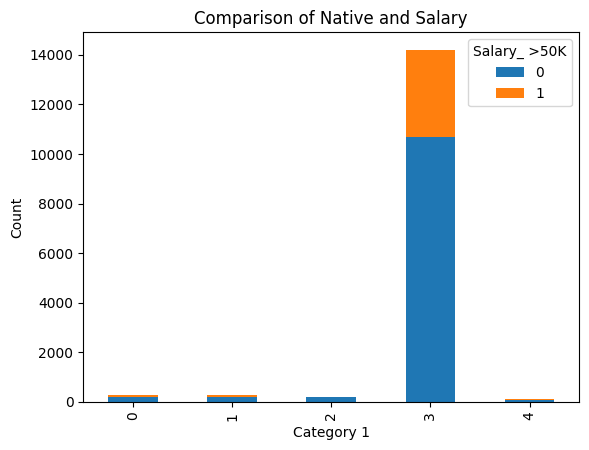

In [ ]:
cross_tab = pd.crosstab(df1['native'], df1['Salary_ >50K'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Native and Salary')
plt.show()

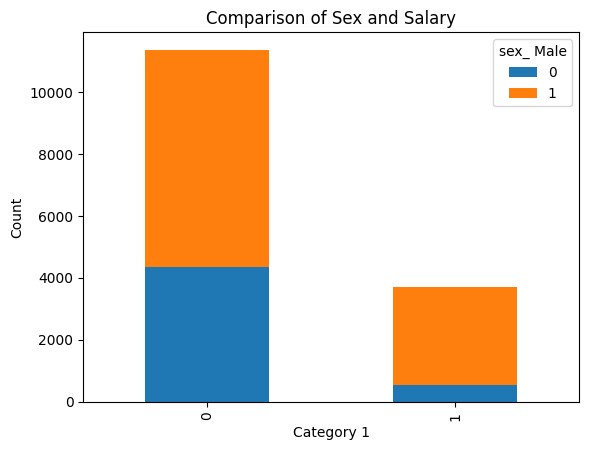

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['sex_ Male'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Sex and Salary')
plt.show()

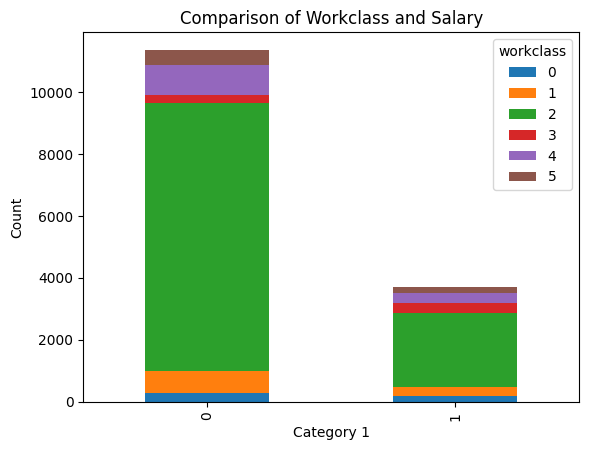

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['workclass'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Workclass and Salary')
plt.show()

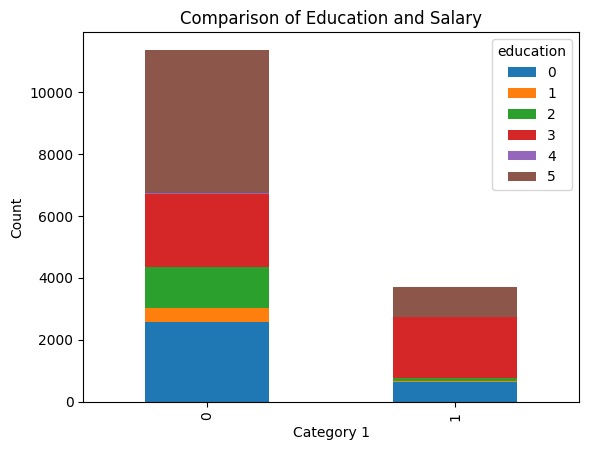

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['education'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Education and Salary')
plt.show()

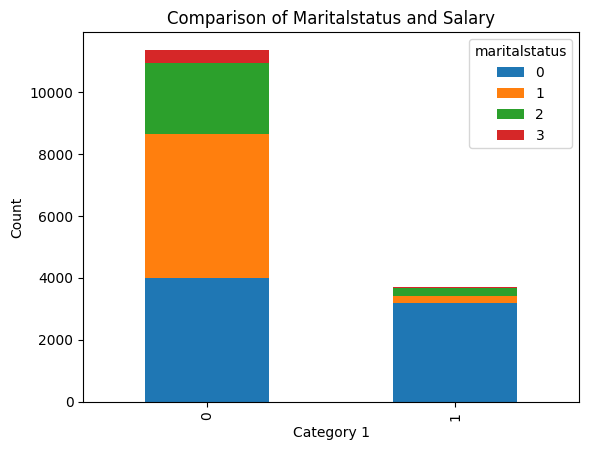

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['maritalstatus'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Maritalstatus and Salary')
plt.show()

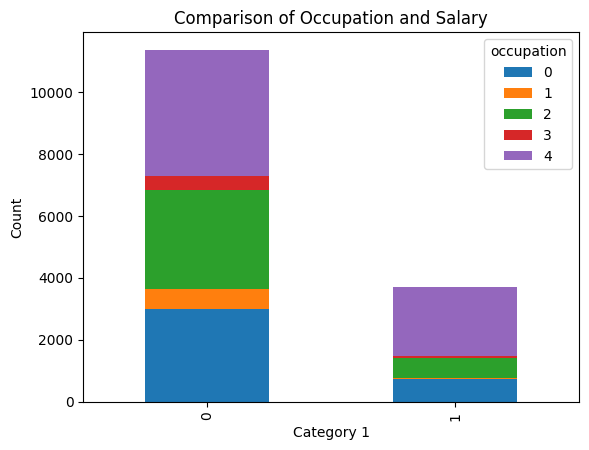

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['occupation'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Occupation and Salary')
plt.show()

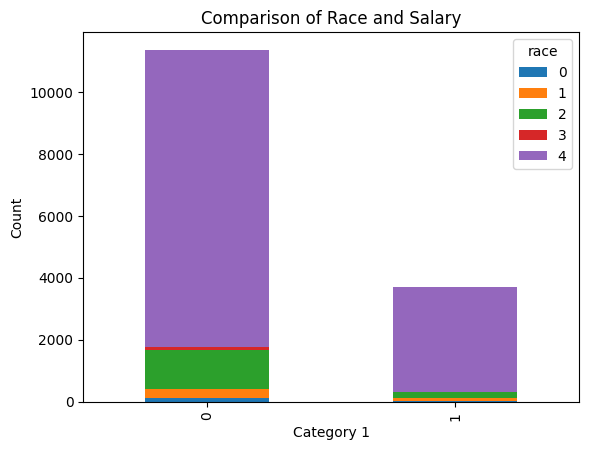

In [ ]:
cross_tab = pd.crosstab(df1['Salary_ >50K'], df1['race'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Category 1')
plt.ylabel('Count')
plt.title('Comparison of Race and Salary')
plt.show()

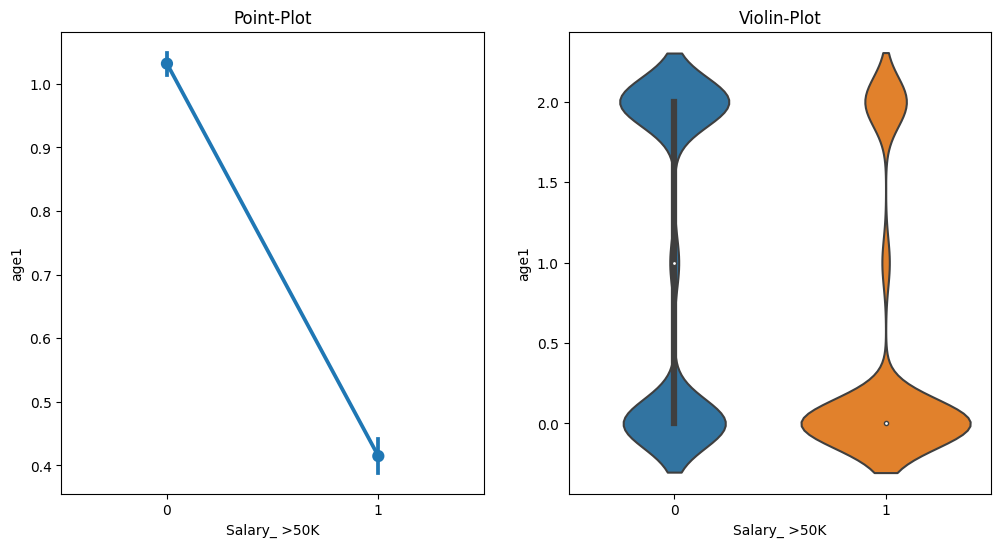

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df1['Salary_ >50K'], y=df1['age1'], data=df1, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df1['Salary_ >50K'], y=df1['age1'], data=df1, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.show()

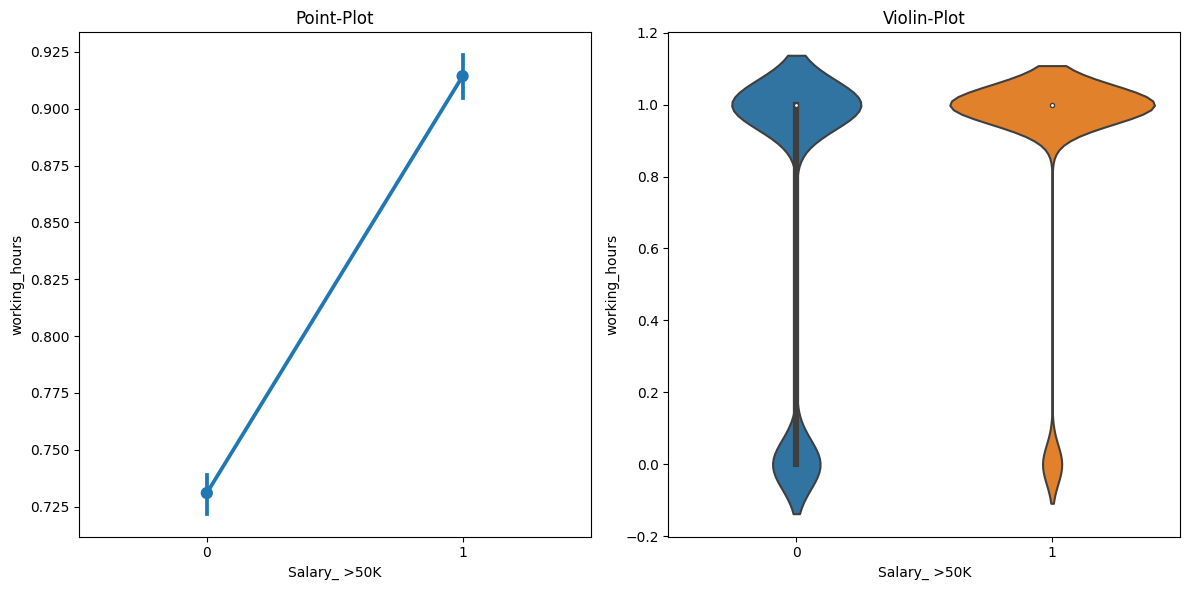

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.pointplot(x=df1['Salary_ >50K'], y=df1['working_hours'], data=df1, ax=axes[0])
axes[0].set_title('Point-Plot')
sns.violinplot(x=df1['Salary_ >50K'], y=df1['working_hours'], data=df1, ax=axes[1])
axes[1].set_title('Violin-Plot')
plt.tight_layout()
plt.show()

#**MODELLING**

In [ ]:
a = df
b = df1

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# normalized_hours = mm.fit_transform(a['hoursperweek'].values.reshape(-1, 1))
# normalized_hours1 = mm.fit_transform(b['hoursperweek'].values.reshape(-1, 1))
# a['hoursperweek'] = normalized_hours
# b['hoursperweek'] = normalized_hours1

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train = a.drop(['capitalgain', 'sex_ Male', 'age1','Salary_ >50K','working_hours'], axis=1)
Y_train = a['Salary_ >50K']

X_test = b.drop(['capitalgain','sex_ Male','age1', 'Salary_ >50K','working_hours'], axis=1)
Y_test = b['Salary_ >50K']

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)

In [ ]:
accuracy_train = accuracy_score(Y_train, y_train_pred)
accuracy_train

0.7686747786877093

In [ ]:
accuracy_test = accuracy_score(Y_test, y_test_pred)
accuracy_test

0.7643426294820718

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


# Define the hyperparameter grid
param_grid = {'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7]]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(nb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
# X_test, y_test = ...
test_accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'priors': None}
Test Accuracy: 0.7643426294820718


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'priors': [ [0.1, 0.9], [0.2, 0.8], [0.3, 0.7]]}

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(nb, param_distributions=param_dist, n_iter=3, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on the test set
# X_test, y_test = ...
test_accuracy = random_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'priors': [0.3, 0.7]}
Test Accuracy: 0.5930278884462151


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [ ]:
a = df.drop(['capitalgain','capitalloss', 'race', 'age1', 'sex_ Male','working_hours'],axis=1)
b = df1.drop(['capitalgain','capitalloss', 'race', 'age1', 'sex_ Male','working_hours'], axis=1)

In [ ]:
# Assuming train_data and test_data are your datasets
X_train = a.drop('Salary_ >50K', axis=1)
Y_train = a['Salary_ >50K']

X_test = b.drop('Salary_ >50K', axis=1)
Y_test = b['Salary_ >50K']


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
predictions = nb_classifier.predict(X_test)

In [ ]:
nb_classifier.score(X_train,Y_train)

0.8024932860316303

In [ ]:
nb_classifier.score(X_test,Y_test)

0.8031208499335989

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(nb_classifier, X_train, Y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.79877341 0.80387931 0.80404509 0.8002321  0.81283156]
Mean Accuracy: 0.8039522953112435


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

In [ ]:
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]}, scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)
test_accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'alpha': 0.1}
Test Accuracy: 0.8031208499335989


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
param_dist = {'alpha': uniform(0.1, 2.0)}

In [ ]:
random_search = RandomizedSearchCV(nb_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7967517f6320>},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate on the test set
# X_test, y_test = ...
test_accuracy = random_search.best_estimator_.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Best Hyperparameters: {'alpha': 0.849080237694725}
Test Accuracy: 0.8031208499335989


#**CONCLUSION**
#So, after trying out with Gaussian naive bayes, multinomial naive bayes along with cross validation and grid search, the maximum accuracy that we get is around 81%.